# Murder Prediction Project

## Richard Rivera, Kevin Swei, Benjamin Textor

### CST383 - Intro to Data Science

## Introduction

### The source data is from: https://www.murderdata.org/p/about.html. The objective is to figure out how the US government and law enforcement are being accountable of homicides, that were both solved and unsolved. We focused to know the data  that is provided from the source from which weapons being used and any characteristic factors of the victims/offenders. We will being using the data to show any figures that show any possible regulations that can solve a possible homicide.  



First, import the packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [37]:
df = pd.read_csv('https://www.dropbox.com/s/as16jfs22env37r/SHR76_21.csv?dl=1', low_memory=False)

In [38]:
del df['ID']
del df['Ori']
del df['Source']
del df['ActionType']
del df['Incident']
del df['StateName']
del df['MSA']
del df['FileDate']
del df['Subcircum']

In [39]:
ca_df = df[df['State'] == 'California']
nj_df = df[df['State'] == 'New Jersey']

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849144 entries, 0 to 849143
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CNTYFIPS      849144 non-null  object
 1   State         849144 non-null  object
 2   Agency        849144 non-null  object
 3   Agentype      849144 non-null  object
 4   Solved        849144 non-null  object
 5   Year          849144 non-null  int64 
 6   Month         849144 non-null  object
 7   Homicide      849144 non-null  object
 8   Situation     849144 non-null  object
 9   VicAge        849144 non-null  int64 
 10  VicSex        849144 non-null  object
 11  VicRace       849144 non-null  object
 12  VicEthnic     849144 non-null  object
 13  OffAge        849144 non-null  int64 
 14  OffSex        849144 non-null  object
 15  OffRace       849144 non-null  object
 16  OffEthnic     849144 non-null  object
 17  Weapon        849144 non-null  object
 18  Relationship  849144 non

In [41]:
df.describe()

,Year,VicAge,OffAge,VicCount,OffCount
count,849144.000000,849144.000000,849144.000000,849144.000000,849144.000000
mean,1997.610952,47.474017,354.392947,0.130049,0.187782
std,13.392627,118.439549,456.614516,0.566959,0.600314
min,1976.000000,0.000000,0.000000,0.000000,0.000000
25%,1986.000000,22.000000,24.000000,0.000000,0.000000
50%,1996.000000,30.000000,38.000000,0.000000,0.000000
75%,2009.000000,42.000000,999.000000,0.000000,0.000000
max,2021.000000,999.000000,999.000000,21.000000,40.000000


## Data Visualization

In [42]:
ca_df.isnull().sum()
nj_df.isnull().sum()

print("Top Weapons Used for Homicide in California (CA)")
print(ca_df['Weapon'].value_counts().head(11))
print(" ")
print("Top Weapons Used for Homicide in New Jersey (NJ)")
print(nj_df['Weapon'].value_counts().head(11))

Top Weapons Used for Homicide in California (CA)
Handgun - pistol, revolver, etc         66742
Knife or cutting instrument             19289
Firearm, type not stated                 7813
Personal weapons, includes beating       6656
Blunt object - hammer, club, etc         6170
Shotgun                                  5323
Rifle                                    5063
Other or type unknown                    3435
Strangulation - hanging                  2225
Asphyxiation - includes death by gas      897
Fire                                      810
Name: Weapon, dtype: int64
 
Top Weapons Used for Homicide in New Jersey (NJ)
Handgun - pistol, revolver, etc         8568
Knife or cutting instrument             3643
Personal weapons, includes beating      1536
Blunt object - hammer, club, etc        1123
Firearm, type not stated                 806
Other or type unknown                    662
Fire                                     420
Shotgun                                  413
Strangu

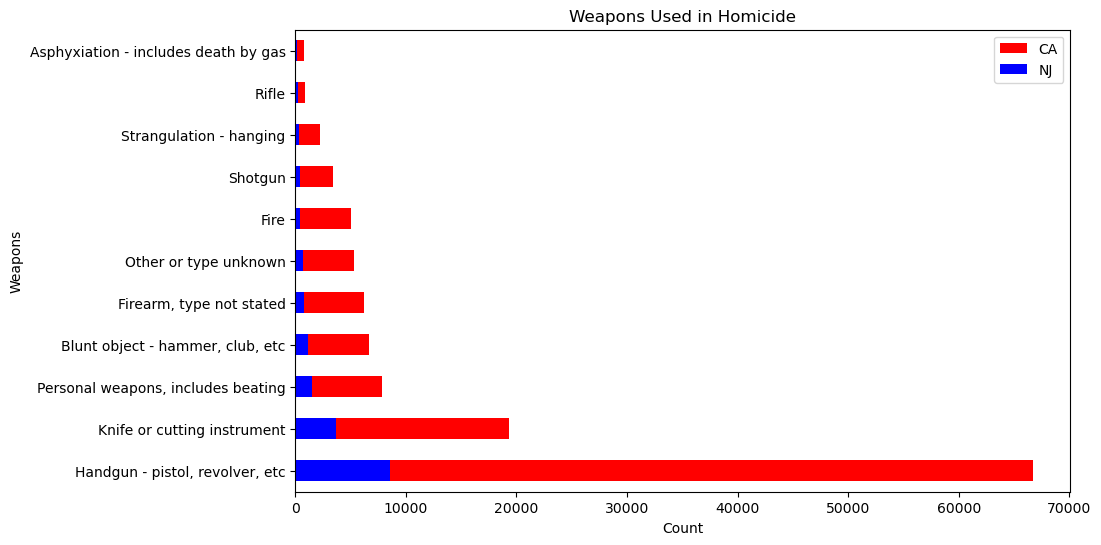

In [43]:
plt.figure(figsize=(10,6))
ca_df['Weapon'].value_counts().head(11).plot(kind='barh', color='red', label='CA')
nj_df['Weapon'].value_counts().head(11).plot(kind='barh', color='blue', label='NJ')
plt.title('Weapons Used in Homicide')
plt.xlabel('Count')
plt.ylabel('Weapons')
plt.legend()

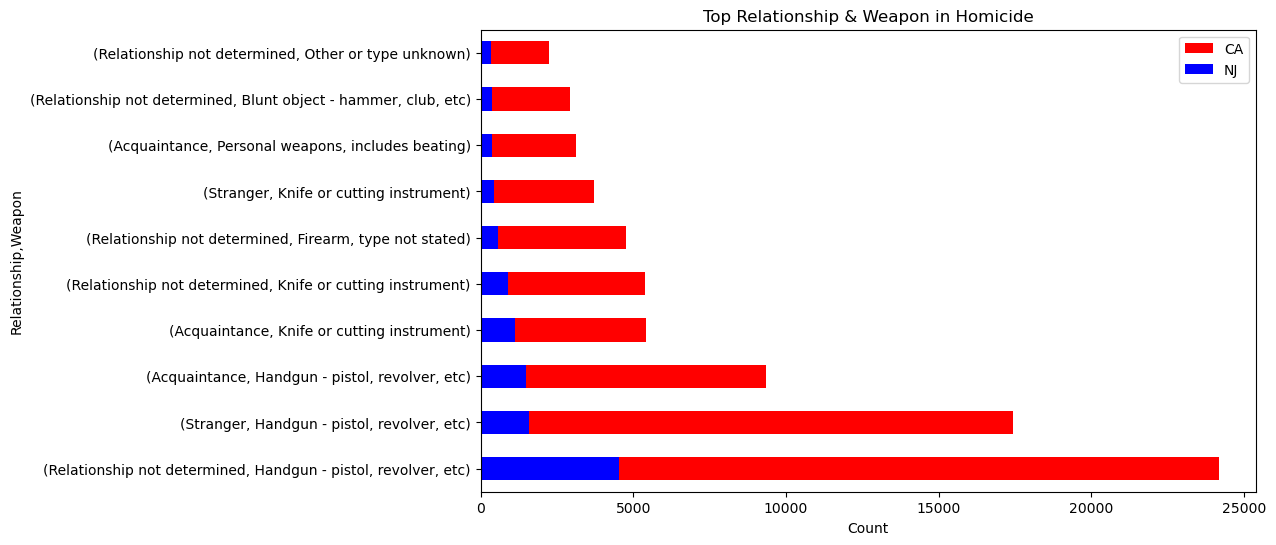

In [44]:

plt.figure(figsize=(10,6))
ca_df.groupby(['Relationship'])['Weapon'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='red', label='CA')
nj_df.groupby(['Relationship'])['Weapon'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='blue', label='NJ')
plt.title('Top Relationship & Weapon in Homicide')
plt.xlabel('Count')
plt.legend()

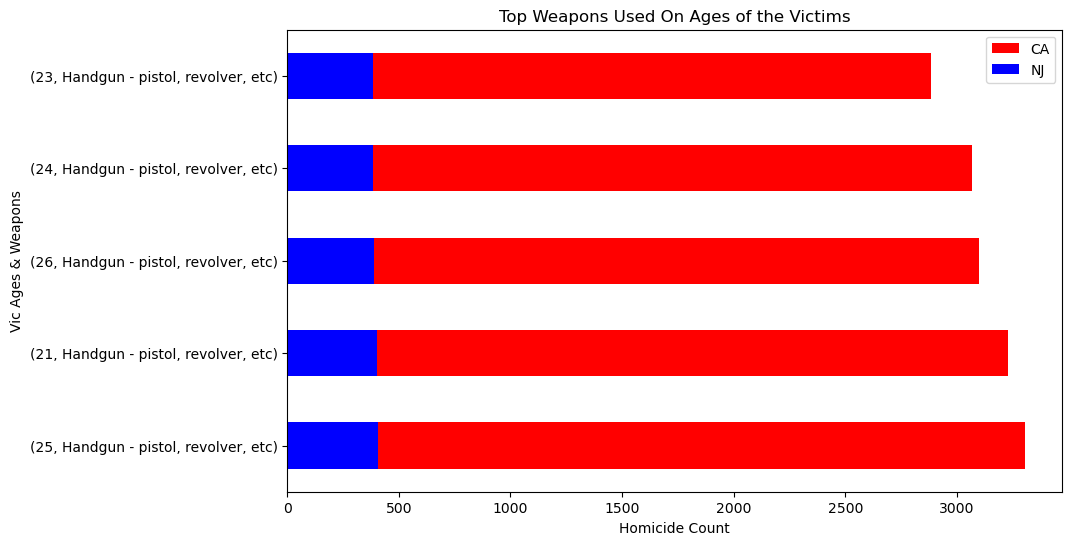

In [45]:

plt.figure(figsize=(10,6))
ca_df.groupby(['VicAge'])['Weapon'].value_counts().sort_values(ascending=False)[:5].plot(kind='barh', color='red', label='CA')
nj_df.groupby(['VicAge'])['Weapon'].value_counts().sort_values(ascending=False)[:5].plot(kind='barh', color='blue', label='NJ')
plt.title('Top Weapons Used On Ages of the Victims')
plt.xlabel('Homicide Count')
plt.ylabel('Vic Ages & Weapons')
plt.legend()

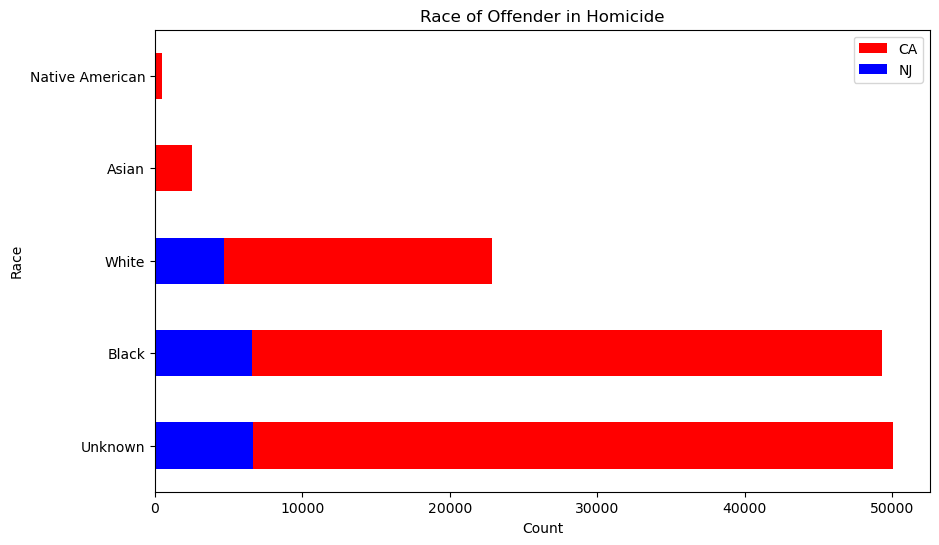

In [46]:
plt.figure(figsize=(10,6))
ca_df['OffRace'].value_counts().head(11).plot(kind='barh', color='red', label='CA')
nj_df['OffRace'].value_counts().head(11).plot(kind='barh', color='blue', label='NJ')

plt.title('Race of Offender in Homicide')
plt.xlabel('Count')
plt.ylabel('Race')
plt.legend()

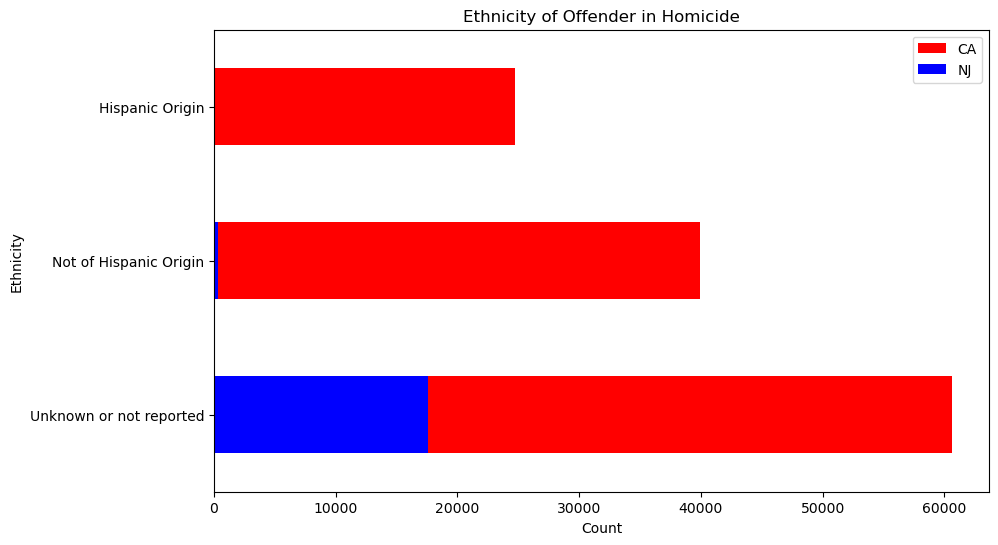

In [47]:
plt.figure(figsize=(10,6))
ca_df['OffEthnic'].value_counts().head(11).plot(kind='barh', color='red', label='CA')
nj_df['OffEthnic'].value_counts().head(11).plot(kind='barh', color='blue', label='NJ')

plt.title('Ethnicity of Offender in Homicide')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.legend()

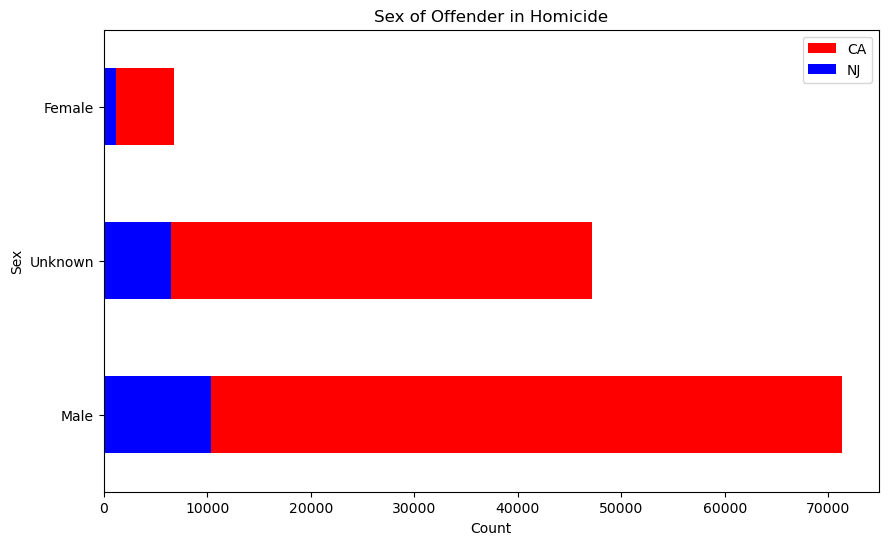

In [48]:
plt.figure(figsize=(10,6))
ca_df['OffSex'].value_counts().head(11).plot(kind='barh', color='red', label='CA')
nj_df['OffSex'].value_counts().head(11).plot(kind='barh', color='blue', label='NJ')

plt.title('Sex of Offender in Homicide')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.legend()

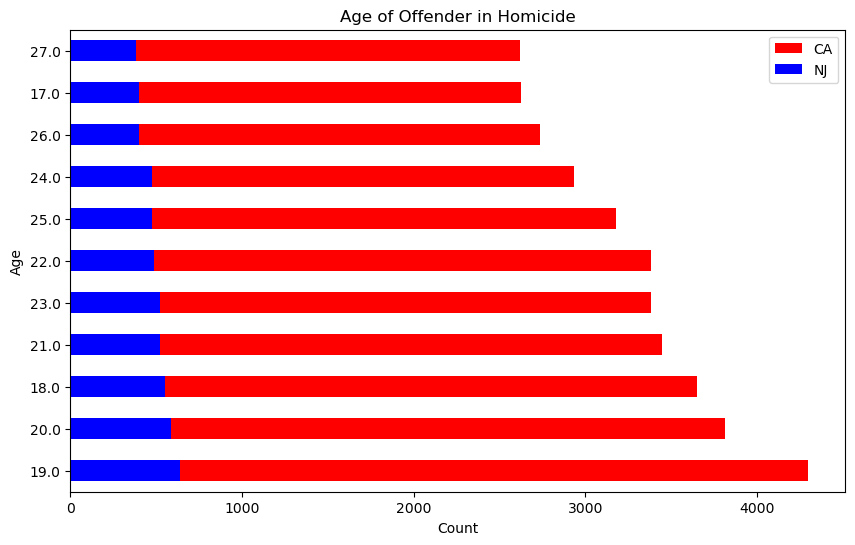

In [49]:
plt.figure(figsize=(10,6))

s = ca_df['OffAge']

t = nj_df['OffAge']

s.where(s < 999).value_counts().head(11).plot(kind='barh', color='red', label='CA')
t.where(t < 999).value_counts().head(11).plot(kind='barh', color='blue', label='NJ')

plt.title('Age of Offender in Homicide')
plt.xlabel('Count')
plt.ylabel('Age')
plt.legend()

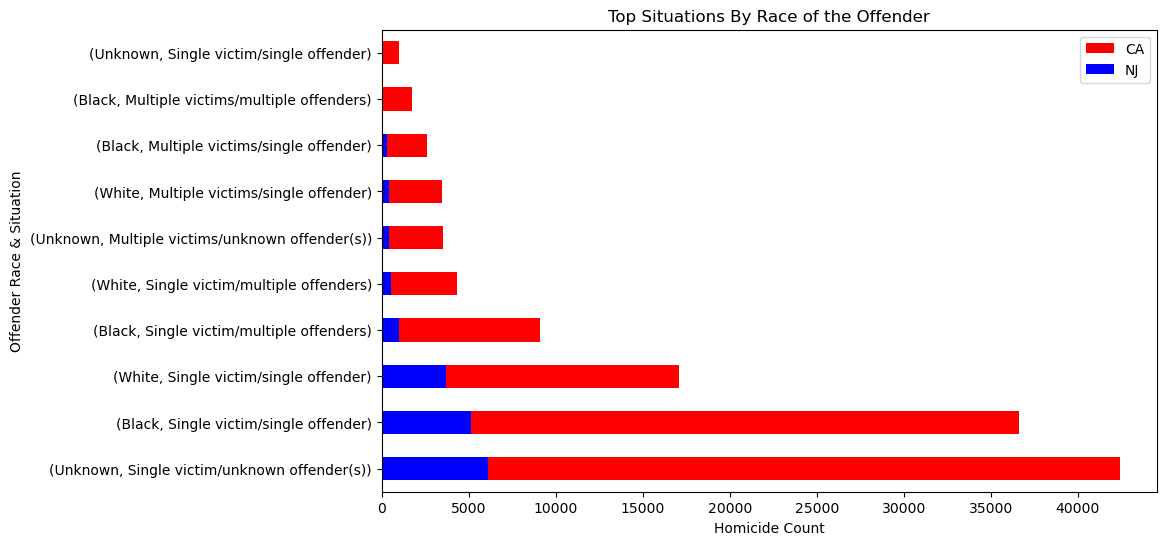

In [50]:
plt.figure(figsize=(10,6))
ca_df.groupby(['OffRace'])['Situation'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='red', label='CA')
nj_df.groupby(['OffRace'])['Situation'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='blue', label='NJ')

plt.title('Top Situations By Race of the Offender')
plt.xlabel('Homicide Count')
plt.ylabel('Offender Race & Situation')
plt.legend()

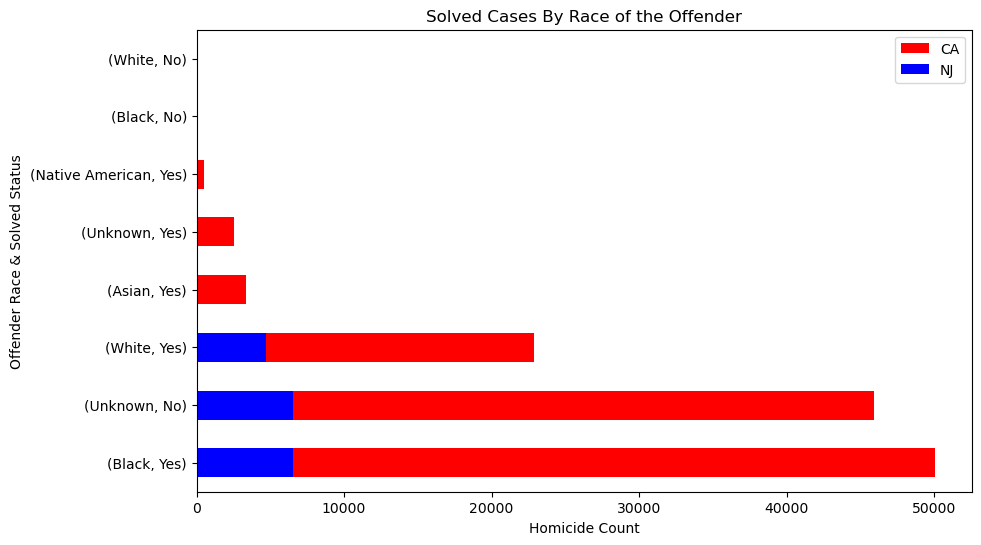

In [51]:
plt.figure(figsize=(10,6))
ca_df.groupby(['OffRace'])['Solved'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='red', label='CA')
nj_df.groupby(['OffRace'])['Solved'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='blue', label='NJ')

plt.title('Solved Cases By Race of the Offender')
plt.xlabel('Homicide Count')
plt.ylabel('Offender Race & Solved Status')
plt.legend()

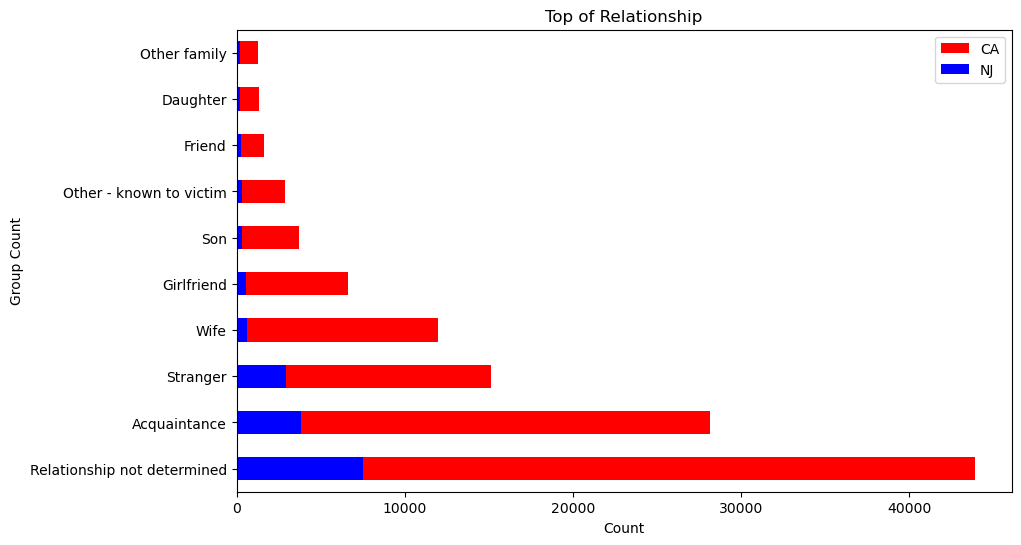

In [52]:
plt.figure(figsize=(10,6))
ca_df['Relationship'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='red', label='CA')
nj_df['Relationship'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='blue', label='NJ')
plt.title('Top of Relationship')
plt.xlabel('Count')
plt.ylabel('Group Count')
plt.legend()

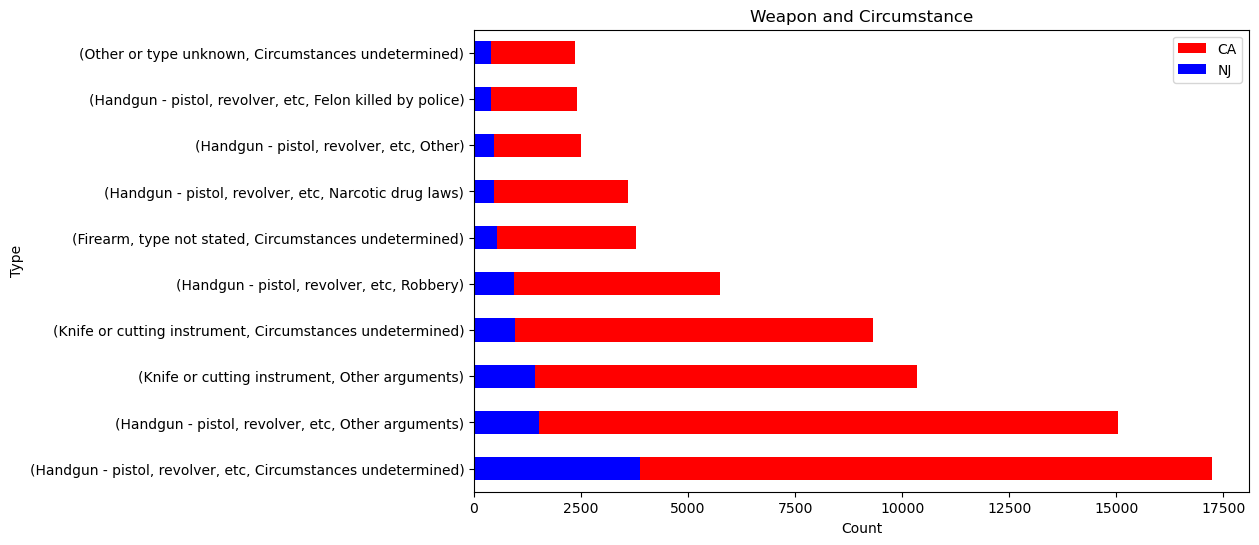

In [53]:
plt.figure(figsize=(10,6))
ca_df.groupby(['Weapon'])['Circumstance'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='red', label='CA')
nj_df.groupby(['Weapon'])['Circumstance'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='blue', label='NJ')
plt.title('Weapon and Circumstance')
plt.xlabel('Count')
plt.ylabel('Type')
plt.legend()

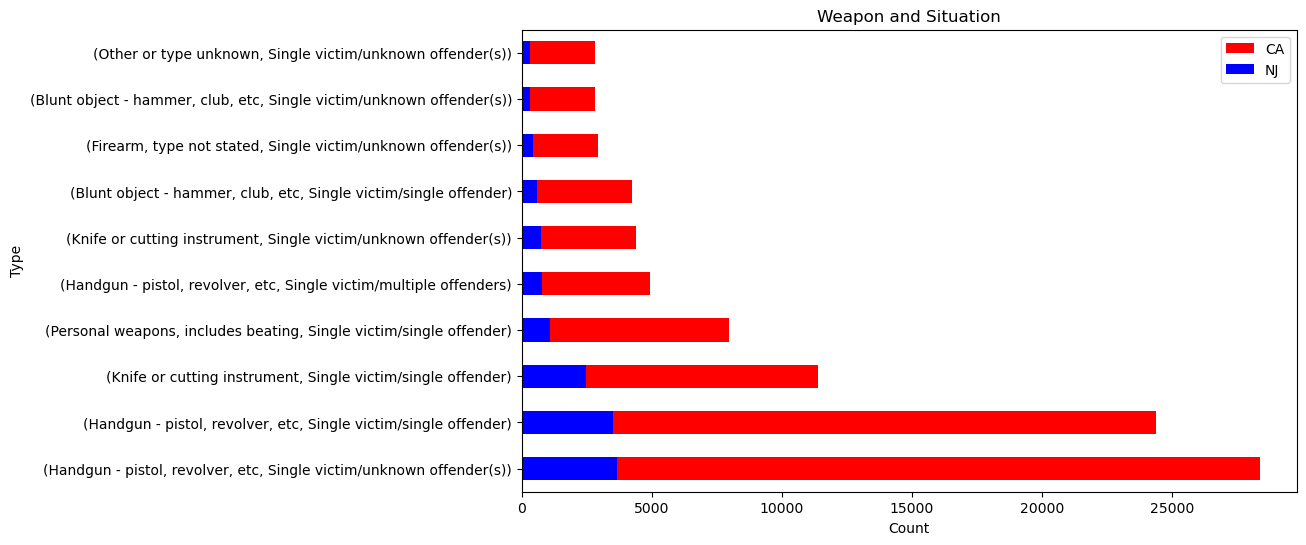

In [54]:
plt.figure(figsize=(10,6))
ca_df.groupby(['Weapon'])['Situation'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='red', label='CA')
nj_df.groupby(['Weapon'])['Situation'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='blue', label='NJ')
plt.title('Weapon and Situation')
plt.xlabel('Count')
plt.ylabel('Type')
plt.legend()

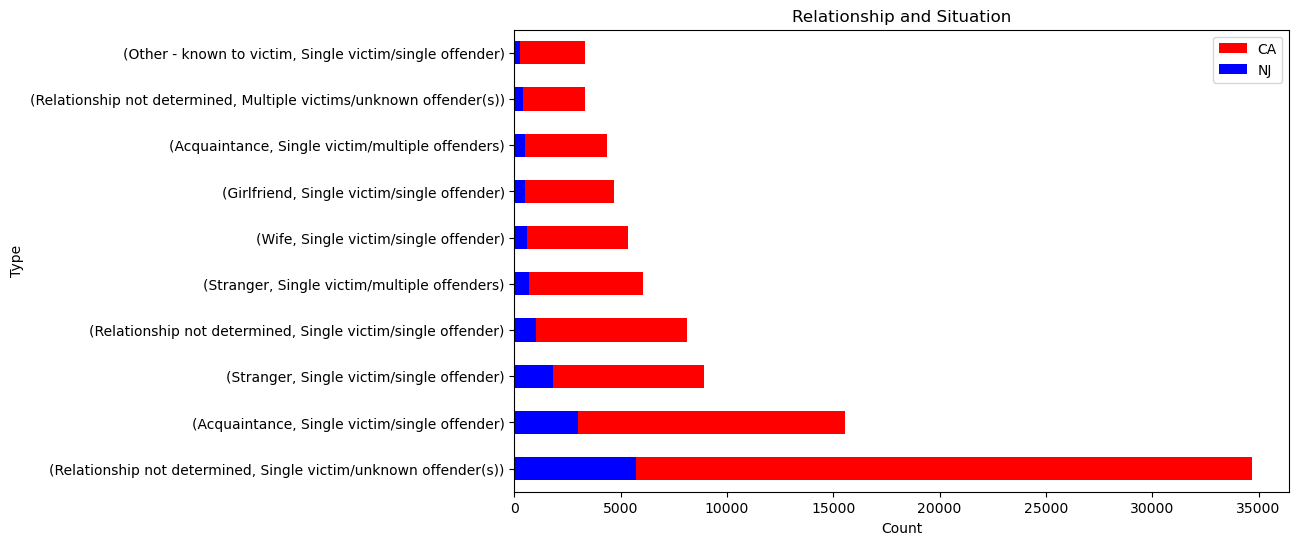

In [55]:
plt.figure(figsize=(10,6))
ca_df.groupby(['Relationship'])['Situation'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='red', label='CA')
nj_df.groupby(['Relationship'])['Situation'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='blue', label='NJ')
plt.title('Relationship and Situation')
plt.xlabel('Count')
plt.ylabel('Type')
plt.legend()

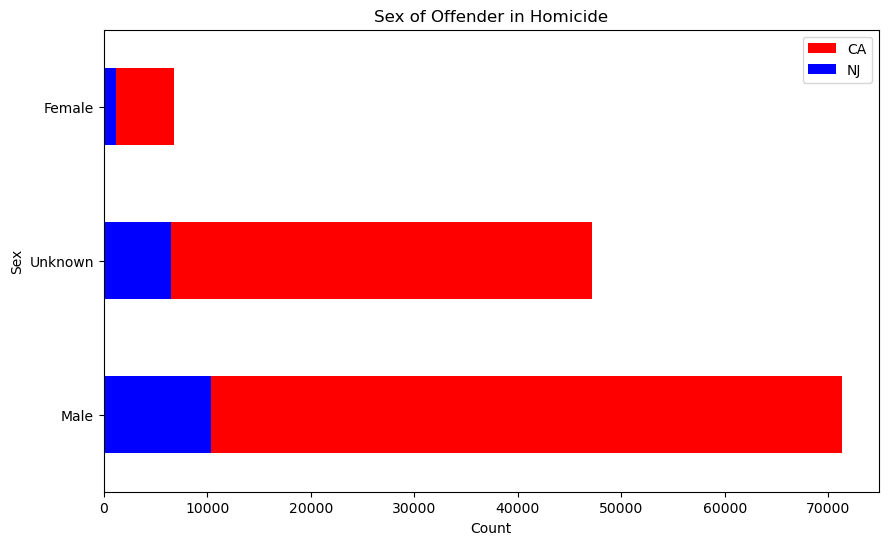

In [56]:
plt.figure(figsize=(10,6))
ca_df['OffSex'].value_counts().head(11).plot(kind='barh', color='red', label='CA')
nj_df['OffSex'].value_counts().head(11).plot(kind='barh', color='blue', label='NJ')

plt.title('Sex of Offender in Homicide')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.legend()

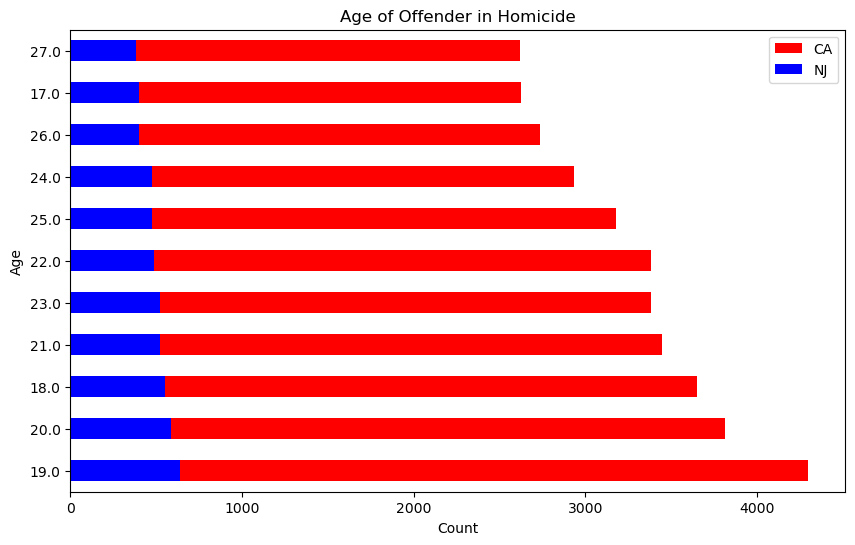

In [57]:
plt.figure(figsize=(10,6))

s = ca_df['OffAge']

t = nj_df['OffAge']

s.where(s < 999).value_counts().head(11).plot(kind='barh', color='red', label='CA')
t.where(t < 999).value_counts().head(11).plot(kind='barh', color='blue', label='NJ')

plt.title('Age of Offender in Homicide')
plt.xlabel('Count')
plt.ylabel('Age')
plt.legend()

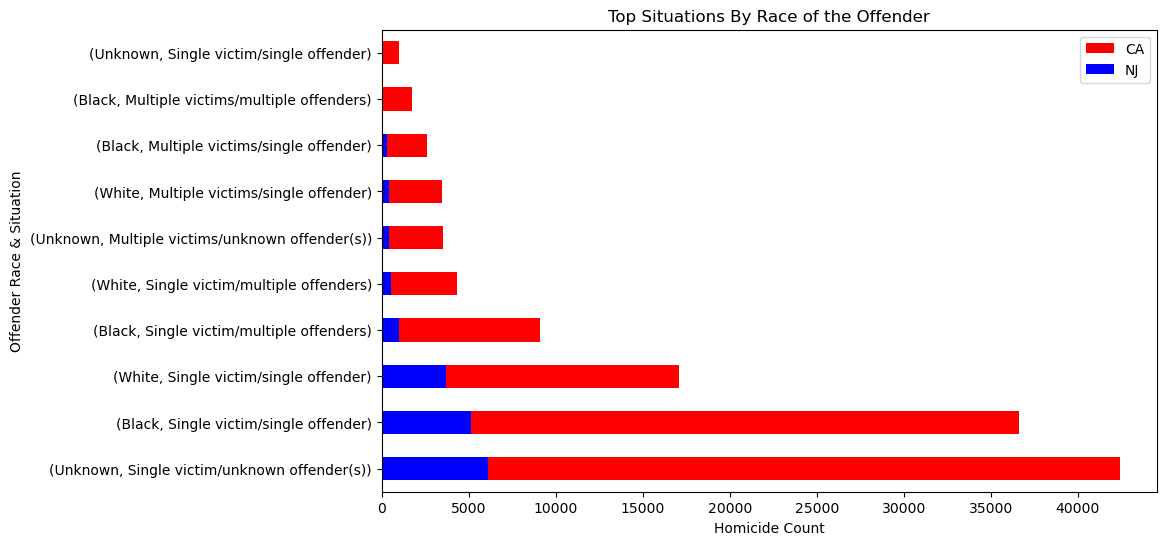

In [58]:
plt.figure(figsize=(10,6))
ca_df.groupby(['OffRace'])['Situation'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='red', label='CA')
nj_df.groupby(['OffRace'])['Situation'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='blue', label='NJ')

plt.title('Top Situations By Race of the Offender')
plt.xlabel('Homicide Count')
plt.ylabel('Offender Race & Situation')
plt.legend()

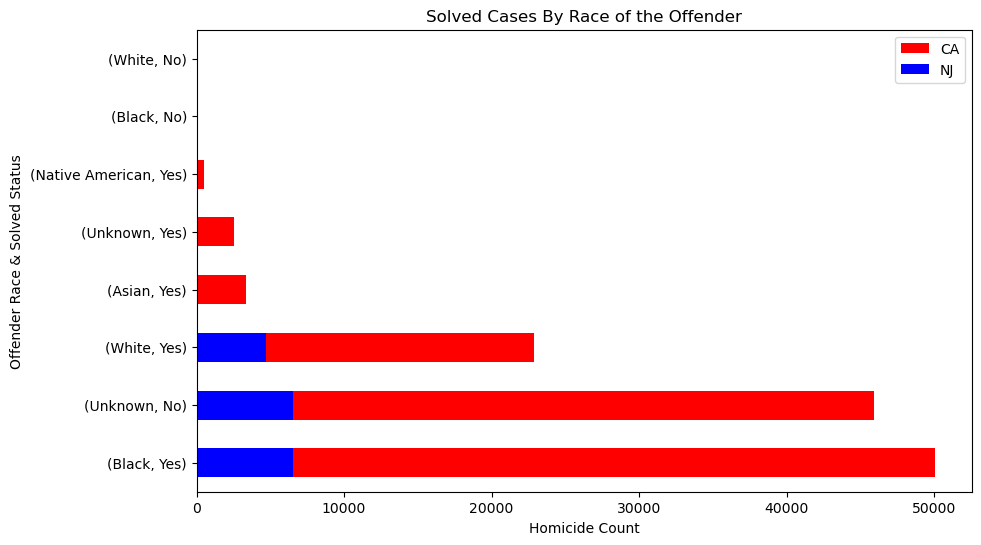

In [59]:
plt.figure(figsize=(10,6))
ca_df.groupby(['OffRace'])['Solved'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='red', label='CA')
nj_df.groupby(['OffRace'])['Solved'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='blue', label='NJ')

plt.title('Solved Cases By Race of the Offender')
plt.xlabel('Homicide Count')
plt.ylabel('Offender Race & Solved Status')
plt.legend()

## Machine Learning Models

In this part, we will focus ages of the victims and offenders because the weapons and relationships couldn't convert into integer data due to amount of string variables, it contained. 

### Linear Regression

In [69]:
X1 = ca_df['VicAge']
y1 = ca_df['OffAge']

X1 = np.array(X1).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

regr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
regr.fit(X_train, y_train)

predct = regr.predict(X_test)

print("California Data")
print("Interception: ", '{:.2f}'.format(regr.intercept_))
print("Score: ", regr.score(X_train, y_train))

California Data
Interception:  398.18
Score:  0.005077979149915812


In [70]:
X2 = nj_df['VicAge']
y2 = nj_df['OffAge']

X2 = np.array(X2).reshape(-1,1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

regr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
regr.fit(X_train2, y_train2)

predct = regr.predict(X_test2)

print("New Jersey Data")
print("Interception: ", '{:.2f}'.format(regr.intercept_))
print("Score: ", regr.score(X_train, y_train))

New Jersey Data
Interception:  375.54
Score:  0.002237596853026269


The regression that predicts the ages of the victims based from the offender's age had a lead to a issue. So, by changing the age column to its mean of 23, because the data has a flaw that reaches to 999.

In [72]:
# Choose the model to use
knn_modl = KNeighborsClassifier(n_neighbors=1)

# fit the model
knn_modl.fit(X_train, y_train)

# test the data
predct = knn_modl.predict(X_test)

# the accuracy score
train_acc = knn_modl.score(X_train, y_train)
test_acc = knn_modl.score(X_test, y_test)

# print
print("California Data")
print("KNeighbors Classifier Train Accuracy: {:.2f}%".format(train_acc * 100))
print("KNeighbors Classifier Test Accuracy: {:.2f}%".format(test_acc * 100))

California Data
KNeighbors Classifier Train Accuracy: 8.85%
KNeighbors Classifier Test Accuracy: 8.71%


In [75]:
# Choose the model to use
knn_mod = KNeighborsClassifier(n_neighbors=1)

# fit the model
knn_mod.fit(X_train2, y_train2)

# test the data
predct = knn_mod.predict(X_test2)

# the accuracy score
train_acc = knn_mod.score(X_train2, y_train2)
test_acc = knn_mod.score(X_test2, y_test2)

# print
print("New Jersey Data")
print("KNeighbors Classifier Train Accuracy: {:.2f}%".format(train_acc * 100))
print("KNeighbors Classifier Test Accuracy: {:.2f}%".format(test_acc * 100))

New Jersey Data
KNeighbors Classifier Train Accuracy: 18.78%
KNeighbors Classifier Test Accuracy: 18.11%


By our accuracy reading from the training and test data has shown a lower percentage. It's most likely due to the amount data of each feature of the dataset was unknown to the raw data that it can offer. Both states has shown an increase over past few years and kept doing so. 